<a href="https://colab.research.google.com/github/pzuniga/DataScience2022-2/blob/main/Project_1_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BOOTCAMP DATA SCIENCE - SPANISH - Wk1**
**Predicción de ventas de productos alimenticios**

Pablo Zúñiga N. / ZetaLabs

Fuente de datos:
Big Mart Sales Prediction
26-05-2016 12:01 AM to 31-12-2022 11:59 PM

https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/


In [678]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer


# Métricas de evaluación de modelo de predicción
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Estas líneas permite revisar visualmente el pipeline
from sklearn import set_config
set_config(display='diagram') # Para mostrar como diagrama

In [679]:
# Montar el directorio de datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [680]:
# Crear variable con ruta de acceso al archivo
filename_csv = "/content/drive/MyDrive/Colab Notebooks/Proyecto_1/Datos/sales_predictions.csv"

# **1. Limpieza de datos**

# 1.1. Análisis preliminar: cargar datos, Head(), tail(), info(), shape()

In [681]:
# 1.1.1. Cargar archivo de datos en df
# Cargar datos CSV  y asignar a dataframe df: sales
df=pd.read_csv(filename_csv)

In [682]:
# 1.1.2. Revisar la cabeza
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [683]:
# 1.1.3. Revisar la cola
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [684]:
# 1.1.4. Obtener la descripción de df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Diccionario de datos:

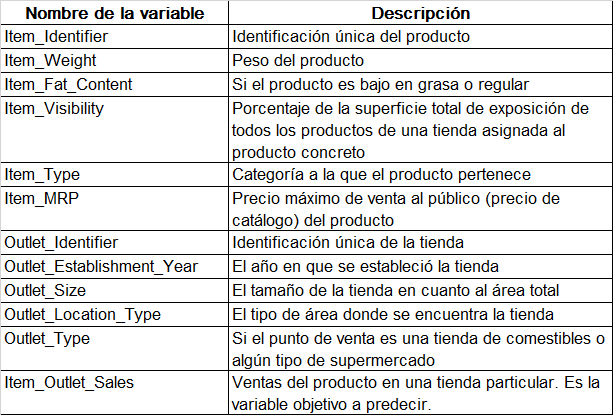

In [685]:
# 1.1.5. Mostrar la forma del df
# filas:8523 / columnas: 12
df.shape

(8523, 12)

# 1.2. Revisar y tratar filas duplicadas

In [686]:
# Búsqueda de duplicados
# No existen duplicados en df
df.duplicated().sum()

0

# 1.3. Revisar y tratar valores faltantes
Se incluye una breve descripción del tratamiento: método y justificación.

In [687]:
# 1.3.1. Identificar y abordar cualquier dato que falte en este conjunto de datos.
# columna 'Item_Weight' 1463 valores NaN
# columna 'Outlet_Size' 2410 valores NaN
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [688]:
# 1.3.2. Valores faltantes columna 'Item_Weight'

# Cuantificación del porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro
missing_percent_Item_Weight=round(df['Item_Weight'].isna().sum()/df.shape[0]*100,2)
print("Porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro",missing_percent_Item_Weight,"%")

Porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro 17.17 %


In [689]:
# Crear filtro para valores NaN en columna 'Item_Weight'
missing_Item_Weight_df=df['Item_Weight'].isna()
# Revisar filas que contienen NaN para y
df.loc[missing_Item_Weight_df,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [690]:
# Crear df con columnas 'Item_Identifier' y 'Item_Weight'
one_per_Item_Identifier=df[['Item_Identifier','Item_Weight']]
# Ordenar df por 'Item_Weight' números primero y NaN último
one_per_Item_Identifier=one_per_Item_Identifier.sort_values('Item_Weight',ascending=True)
# Remover los duplicados y dejar primer registro encontrado
one_per_Item_Identifier=one_per_Item_Identifier.drop_duplicates(subset = 'Item_Identifier', keep = 'first')
print('Cantidad de productos únicos:',one_per_Item_Identifier.shape[0])
print("Cantidad de productos únicos con valores nulos")
one_per_Item_Identifier.isna().sum()
# Cuantro productos con valores nulos en 'Item_Weight'

Cantidad de productos únicos: 1559
Cantidad de productos únicos con valores nulos


Item_Identifier    0
Item_Weight        4
dtype: int64

In [691]:
# Buscar vertical 'Item_Identifier' de df, en  one_per_Item_Identifier, y agregar columna 'Item_Weight' a df
 
Outer_join = pd.merge(df, 
                      one_per_Item_Identifier, 
                      on ='Item_Identifier', 
                      how ='outer')
Outer_join

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,FDA15,9.300,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,9.300
2,FDA15,9.300,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,9.300
3,FDA15,9.300,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,9.300
4,FDA15,9.300,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NCF55,6.675,LF,0.021666,Household,33.3874,OUT046,1997,Small,Tier 1,Supermarket Type1,1235.0590,6.675
8519,NCW30,5.210,Low Fat,0.011072,Household,257.8962,OUT017,2007,NaN,Tier 2,Supermarket Type1,4402.9354,5.210
8520,NCW30,5.210,Low Fat,0.011008,Household,259.5962,OUT035,2004,Small,Tier 2,Supermarket Type1,2848.9582,5.210
8521,NCW05,20.250,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388,20.250


In [692]:
Outer_join['Item_Weight_x']=Outer_join['Item_Weight_y']

In [693]:
# eliminar columna 'Item_Weight_y'
Outer_join=Outer_join.drop(columns=['Item_Weight_y'])


In [694]:
# Renombrar columna 'Item_Weight_x'
Outer_join.columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

In [695]:
# Asignar a df columna 'Item_Weight' limpia
df = Outer_join

In [696]:
# Cuantificación del porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro
missing_percent_Item_Weight=round(df['Item_Weight'].isna().sum()/df.shape[0]*100,2)
print("Porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro",missing_percent_Item_Weight,"%")

# Crear filtro para valores NaN en columna 'Region'
missing_Item_Weight_df=df['Item_Weight'].isna()
# MNostrar filas NaN residual del df
df.loc[missing_Item_Weight_df,:]

Porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro 0.05 %


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4125,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
6440,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
8278,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
8463,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [697]:
# Excluir filas NaN residual del df
df=df.loc[~missing_Item_Weight_df,:]

In [698]:
# 1.4.1. Valores inconsistente de datos 'Item_Fat_Content'

# Diagnóstico: existencia de valores inconsistentes en categorías
# Tratamiento: se homologarán los valores a dos categorías
# Low Fat: LF, low fat
# Regular: reg
df['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [699]:
# Reemplazar valores inconsistentes
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [700]:
# Verificar homologación de categorías
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [701]:
# Verificación de valores nulos en df
# Quedan valores nulos en 'Outlet_Size'
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [702]:
# 1.3.3. Valores faltantes columna 'Outlet_Size'

# Cuantificación del porcentaje de valores nulos en la columna 'Outlet_Sizet' con respecto al total de registro
missing_percent_Outlet_Size=round(df['Outlet_Size'].isna().sum()/df.shape[0]*100,2)
print("Porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro",missing_percent_Outlet_Size,"%")

# Tratamiento:
# Alternativa 1: se procederá a clasificar 'Outlet_Size' utilizando modelo de machine learning. Por mientras, se dejarán como nulos.
# Alternativa 2: Se procederá a clasificar utilizando obras columnas como referencia, tales como: 'Outlet_Location_Type' y 'Outlet_Type'.


Porcentaje de valores nulos en la columna 'Item_Weight' con respecto al total de registro 28.29 %


In [703]:
# Cuenta de valores no nulos
df['Outlet_Size'].value_counts()

Medium    2790
Small     2387
High       932
Name: Outlet_Size, dtype: int64

In [704]:
# Cuenta de valores nulos
df['Outlet_Size'].isna().sum()

2410

In [705]:
# Crear filtro para valores NaN en columna 'Item_Weight'
missing_Outlet_Size_df=df['Outlet_Size'].isna()
# Revisar filas que contienen NaN para y
df.loc[missing_Outlet_Size_df,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,FDA15,9.300,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
4,FDA15,9.300,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
7,FDA15,9.300,Low Fat,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208
9,DRC01,5.920,Regular,0.019309,Soft Drinks,49.0692,OUT017,2007,NaN,Tier 2,Supermarket Type1,1478.0760
11,DRC01,5.920,Regular,0.019239,Soft Drinks,49.8692,OUT045,2002,NaN,Tier 2,Supermarket Type1,1133.1916
...,...,...,...,...,...,...,...,...,...,...,...,...
8507,NCU53,5.485,Low Fat,0.042839,Health and Hygiene,163.7842,OUT045,2002,NaN,Tier 2,Supermarket Type1,1657.8420
8512,FDD28,10.695,Low Fat,0.000000,Frozen Foods,60.5904,OUT017,2007,NaN,Tier 2,Supermarket Type1,410.1328
8516,NCF55,6.675,Low Fat,0.021710,Household,34.9874,OUT045,2002,NaN,Tier 2,Supermarket Type1,247.0118
8519,NCW30,5.210,Low Fat,0.011072,Household,257.8962,OUT017,2007,NaN,Tier 2,Supermarket Type1,4402.9354


In [706]:
# Asignar categoría auxiliar 'Asignar' a valores nulos para mostrarlos en tabla
df['Outlet_Size'].fillna('Asignar', inplace=True)
round(df.groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size'])['Outlet_Size'].count(),0)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           527
                      Supermarket Type1  Medium          930
                                         Small           930
Tier 2                Supermarket Type1  Asignar        1855
                                         Small           930
Tier 3                Grocery Store      Asignar         555
                      Supermarket Type1  High            932
                      Supermarket Type2  Medium          928
                      Supermarket Type3  Medium          932
Name: Outlet_Size, dtype: int64

In [707]:
# Del agrupamiento realizado se deduce que:
# Se aplicarán las siguientes reglas para asignar valor a la clase de 'Outlet_Size' con valores nulos
# Tier 2 +  Supermarket Type1 -> Small
# Tier 3 + Grocery Store -> se homologa a Tier 1 + Grocery Store -> Small
df.loc[(df['Outlet_Location_Type']=='Tier 2')&(df['Outlet_Type']=='Supermarket Type1')&(df['Outlet_Size']=='Asignar'),'Outlet_Size']='Small'
df.loc[(df['Outlet_Location_Type']=='Tier 3')&(df['Outlet_Type']=='Grocery Store')&(df['Outlet_Size']=='Asignar'),'Outlet_Size']='Small'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [708]:
# Verificar asignación de clase
round(df.groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size'])['Outlet_Size'].count(),0)

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           527
                      Supermarket Type1  Medium          930
                                         Small           930
Tier 2                Supermarket Type1  Small          2785
Tier 3                Grocery Store      Small           555
                      Supermarket Type1  High            932
                      Supermarket Type2  Medium          928
                      Supermarket Type3  Medium          932
Name: Outlet_Size, dtype: int64

In [709]:
# Verificar cuenta de valores nulos en df
# No quedan valores nulos en df
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# 1.4. Revisar y tratar valores incosistentes
Se incluye una breve descripción del tratamiento: método y justificación.

In [710]:
# 1.4.1. Revisar valores inconsistente de datos 'Item_Fat_Content'
# Se realizó en paso anterior para utilizarlo como input en proceso de limpieza de nulos en columna 'Item_Weight'
# revisar 1.3.2.

In [711]:
# 1.4.2. Revisar valores inconsistente de datos 'Item_Visibility'

# Diagnóstico: existencia de valores inconsistentes en categorías, 0%
# Tratamiento: los valores inconsistentes (0%) serán reemplazados con NaN y luego serán imputados con SimpleImputer con la media,
# de esta manera serán preparados para el modelo de machine learning

round(df['Item_Visibility'].describe()*100,4)

count    851900.0000
mean          6.6112
std           5.1586
min           0.0000
25%           2.6983
50%           5.3925
75%           9.4558
max          32.8391
Name: Item_Visibility, dtype: float64

In [712]:
# Reemplazo de valores '0%' en NaN
# Más abajo serán imputados con la media de la columna
df['Item_Visibility'] = df['Item_Visibility'].replace(0,np.nan)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            7993 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [713]:
# 1.4.3. Revisar valores inconsistente de datos 'Item_Type'
# No se aprecian inconsistencias en las clases
print('cantidad de valores no nulos:',df['Item_Type'].value_counts().sum())
df['Item_Type'].value_counts()

cantidad de valores no nulos: 8519


Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [714]:
# 1.4.4. Revisar valores inconsistente de datos 'Item_MRP'
# No se aprecian inconsistencias en los valores (por ejemplo, negativos o ceros)
df['Item_MRP'].describe()

count    8519.000000
mean      141.010019
std        62.283594
min        31.290000
25%        93.844900
50%       143.047000
75%       185.676600
max       266.888400
Name: Item_MRP, dtype: float64

In [715]:
# 1.4.5. Revisar valores inconsistente de datos 'Outlet_Identifier'
# No se aprecian inconsistencias en las clases
df['Outlet_Identifier'].value_counts()

OUT013    932
OUT027    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    527
Name: Outlet_Identifier, dtype: int64

In [716]:
# 1.4.6. Revisar valores inconsistente de datos 'Outlet_Identifier'
# No se aprecian inconsistencias en los valores
df['Outlet_Establishment_Year'].value_counts()

1985    1459
1987     932
1999     930
2004     930
1997     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [717]:
# 1.4.7. Revisar valores inconsistente de datos 'Outlet_Size'
# No se aprecian inconsistencias en las clases
df['Outlet_Size'].value_counts()

Small     4797
Medium    2790
High       932
Name: Outlet_Size, dtype: int64

In [718]:
# 1.4.8. Revisar valores inconsistente de datos 'Outlet_Location_Type'
# No se aprecian inconsistencias en las clases
df['Outlet_Location_Type'].value_counts()

Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: Outlet_Location_Type, dtype: int64

In [719]:
# 1.4.9. Revisar valores inconsistente de datos 'Outlet_Type'
# No se aprecian inconsistencias en las clases
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [720]:
# 1.4.10. Revisar valores inconsistente de datos 'Item_Outlet_Sales'
# No se aprecian inconsistencias en los valores
df['Item_Outlet_Sales'].describe()

count     8519.000000
mean      2181.188779
std       1706.511093
min         33.290000
25%        834.247400
50%       1794.331000
75%       3100.630600
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

# **2. Exploración de datos**

# 2.1. Histogramas de frecuencia

Cantidad total de productos: 8519
Cantidad de productos Low Fat: 3003
Cantidad de productos Regular: 5516


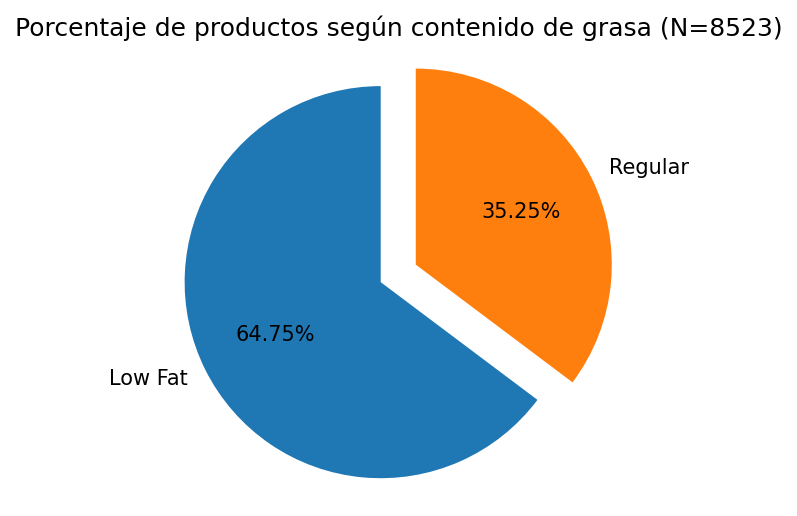

In [721]:
# 2.1.1. Cantidad de productos según contenido de grasas (N=8523)
# Una parte significativa de los productos (>60%) tiene clasificación Low Fat en su contenido de grasa

# Datos y etiquetas
# Nota_ modificar y cambiar los valores, están invertidos
data=np.array((df['Item_Fat_Content'][df['Item_Fat_Content']=='Low Fat'].value_counts()[0],df['Item_Fat_Content'][df['Item_Fat_Content']=='Regular'].value_counts()[0]))
print("Cantidad total de productos:",data.sum())
print("Cantidad de productos Low Fat:",data[1])
print("Cantidad de productos Regular:",data[0])
data=np.round(data/data.sum(),4)*100
label=['Low Fat','Regular']
explotar = [.2, 0]

# Parametrización del gráfico
fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,1,1) 
ax1.pie(data, labels=label, explode=explotar,  autopct='%.2f%%', shadow = False, startangle=90)    #Formato de la torta sombra/inicio de las porciones, autopct=absolute_value
ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)
ax1.set_title("Porcentaje de productos según contenido de grasa (N=8523)")
plt.show()

Venta total de productos: 18581547.0 USD


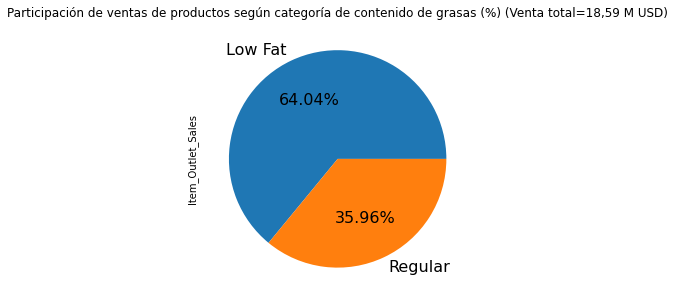

In [722]:
# 2.1.2. Ventas de productos según categoría de contenido de grasas (N=8523)
# Una parte significativa de los productos vendidos (64.03%) tiene clasificación Low Fat en su contenido de grasa

# Gráfico de torta de "Participación de ventas de productos según categoría (%) (N=8523)"
print("Venta total de productos:", round(df['Item_Outlet_Sales'].sum(),0),"USD")
df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='pie',
                                                                                       title="Participación de ventas de productos según categoría de contenido de grasas (%) (Venta total=18,59 M USD)",
                                                                                       xlabel='Ventas de productos',
                                                                                       autopct='%0.2f%%',
                                                                                       figsize=(5,5),
                                                                                       fontsize=16,
                                                                                       subplots=False)
plt.show()

In [723]:
# 2.1.3. Cantidad de productos según categoría de producto (N=8523)
# El 83% de los productos se encuentran en nueve categorías de productos (en total 16), siendo las más relevantes:
# Fruits and Vegetables (14.46%), Snack Foods (14.08%), Household (10.68%), Frozen Foods (10.04%), Dairy (8.00%)
# Canned (7.61%), Baking Goods (7.60%), Health and Hygiene (6.10%), Soft Drinks (5.22%), Otras categorías (17.00%)

# Porcentaje de participación de productos por categoría
round(df['Item_Type'].value_counts()/df['Item_Type'].value_counts().sum()*100,2)

Fruits and Vegetables    14.46
Snack Foods              14.07
Household                10.68
Frozen Foods             10.04
Dairy                     7.99
Canned                    7.62
Baking Goods              7.59
Health and Hygiene        6.10
Soft Drinks               5.22
Meat                      4.99
Breads                    2.95
Hard Drinks               2.51
Others                    1.98
Starchy Foods             1.74
Breakfast                 1.29
Seafood                   0.75
Name: Item_Type, dtype: float64

In [724]:
# Porcentaje acumulado de participación de productos por 'Item_Type'
# 80/20
round(df['Item_Type'].value_counts().cumsum()/df['Item_Type'].value_counts().sum()*100,2)

Fruits and Vegetables     14.46
Snack Foods               28.54
Household                 39.22
Frozen Foods              49.25
Dairy                     57.25
Canned                    64.87
Baking Goods              72.46
Health and Hygiene        78.57
Soft Drinks               83.79
Meat                      88.78
Breads                    91.72
Hard Drinks               94.24
Others                    96.22
Starchy Foods             97.96
Breakfast                 99.25
Seafood                  100.00
Name: Item_Type, dtype: float64

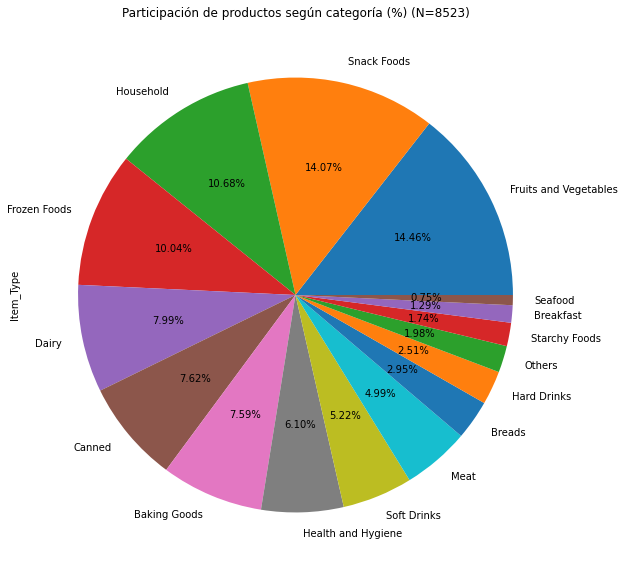

In [725]:
# Gráfico de torta de Participación de productos según categoría (%) (N=8523):
df['Item_Type'].value_counts().plot(kind='pie',
                                    title="Participación de productos según categoría (%) (N=8523)",
                                    autopct='%0.2f%%',
                                    figsize=(10,10))
plt.show()

In [726]:
# 2.1.4. Ventas de productos según categoría de producto (N=8523)
# El 84% de las ventas de productos se encuentran en nueve categorías de productos (de un total 16), siendo las más relevantes:
# Fruits and Vegetables (15.17%), Snack Foods (14.70%), Household (11.06%), Frozen Foods (9.82%), Dairy (8.19%)
# Canned (7.77%), Baking Goods (6.81%), Health and Hygiene (5.62%), Meat (4.94%), Otras categorías (16.00%)

# Porcentaje de ventas de productos según categoría
round(df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending=False)/df['Item_Outlet_Sales'].sum()*100,2)

Item_Type
Fruits and Vegetables    15.18
Snack Foods              14.68
Household                11.06
Frozen Foods              9.82
Dairy                     8.18
Canned                    7.77
Baking Goods              6.81
Health and Hygiene        5.62
Meat                      4.94
Soft Drinks               4.81
Breads                    2.98
Hard Drinks               2.46
Starchy Foods             1.89
Others                    1.75
Breakfast                 1.25
Seafood                   0.80
Name: Item_Outlet_Sales, dtype: float64

In [727]:
# Porcentaje de ventas de productos acumulado según categoría
round(df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).cumsum()/df['Item_Outlet_Sales'].sum()*100,2)

Item_Type
Fruits and Vegetables     15.18
Snack Foods               29.86
Household                 40.92
Frozen Foods              50.74
Dairy                     58.91
Canned                    66.69
Baking Goods              73.50
Health and Hygiene        79.12
Meat                      84.06
Soft Drinks               88.86
Breads                    91.84
Hard Drinks               94.31
Starchy Foods             96.20
Others                    97.95
Breakfast                 99.20
Seafood                  100.00
Name: Item_Outlet_Sales, dtype: float64

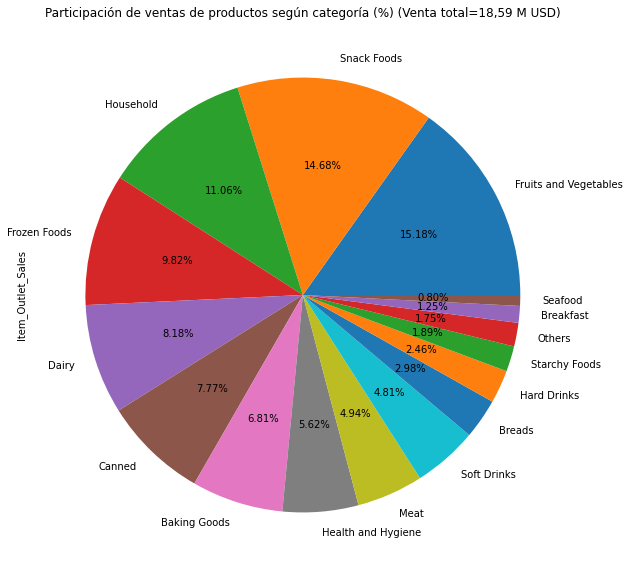

In [728]:
# Gráfico de torta de "Participación de ventas de productos según categoría (%) (N=8523)"
df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='pie',
                                                                                       title="Participación de ventas de productos según categoría (%) (Venta total=18,59 M USD)",
                                                                                       autopct='%0.2f%%',
                                                                                       figsize=(10,10),
                                                                                       subplots=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


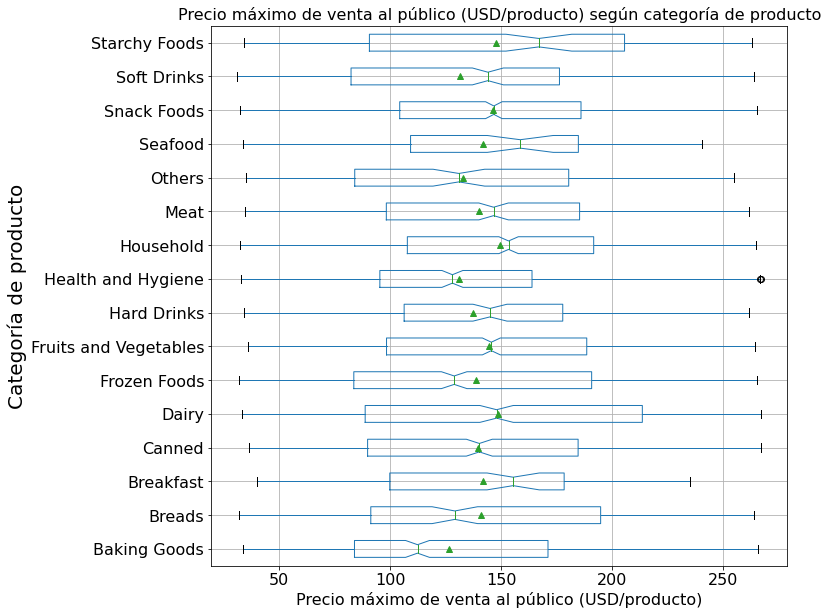

In [729]:
# 2.1.5. Boxplot de Precio máximo de venta al público (USD/producto) según categoría de producto
# Dado que los boxplot se solapan en todas las categorías de productos se puede concluir que:
# No existen diferencias estadísticamente significativa entre las medianas de los precios máximos de los productos y las categorías de producto.
# Presencia de valores atípicos sobre el (P75 + 1.5*RIQ) en categoría 'Health and Hygiene'
df.boxplot(column=['Item_MRP'],
                   by='Item_Type',
                   vert=False,
                   notch=True,
                   showmeans=True,
                   figsize=(10,10))
plt.title('Precio máximo de venta al público (USD/producto) según categoría de producto',fontsize=16);
plt.suptitle('');
plt.xlabel('Precio máximo de venta al público (USD/producto)', fontsize = 16);
plt.ylabel('Categoría de producto', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


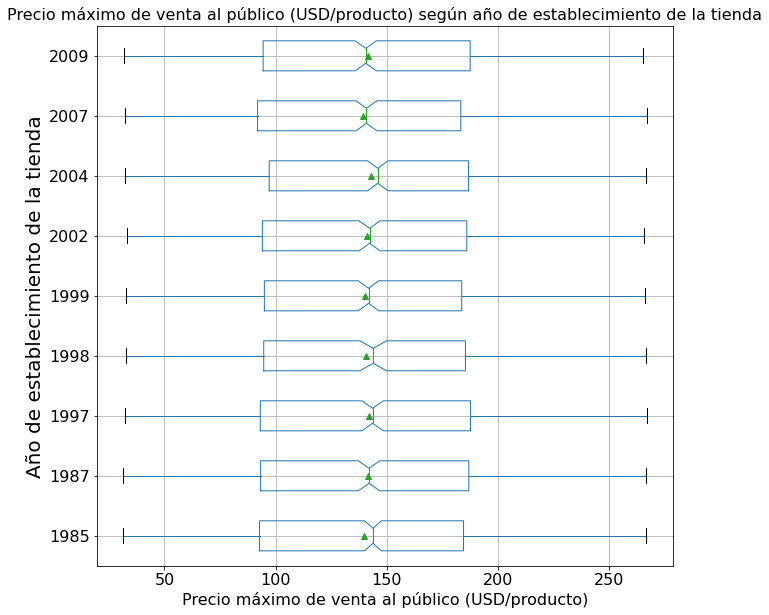

In [730]:
# 2.1.6. Boxplot de Precio máximo de venta al público (USD/producto) según Año en que se estableció la tienda
# Dado que los boxplot se solapan en todas los años en que se establecieron las tiendas se puede concluir que:
# No existen diferencias estadísticamente significativa entre las medianas de los precios máximos de los productos y los años de establecimiento de las tiendas.
# Ausencia de valores atípicos

df.boxplot(column=['Item_MRP'],
                   by='Outlet_Establishment_Year',
                   vert=False,
                   notch=True,
                   showmeans=True,
                   figsize=(10,10))
plt.title('Precio máximo de venta al público (USD/producto) según año de establecimiento de la tienda',fontsize=16);
plt.suptitle('');
plt.xlabel('Precio máximo de venta al público (USD/producto)', fontsize = 16);
plt.ylabel('Año de establecimiento de la tienda', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


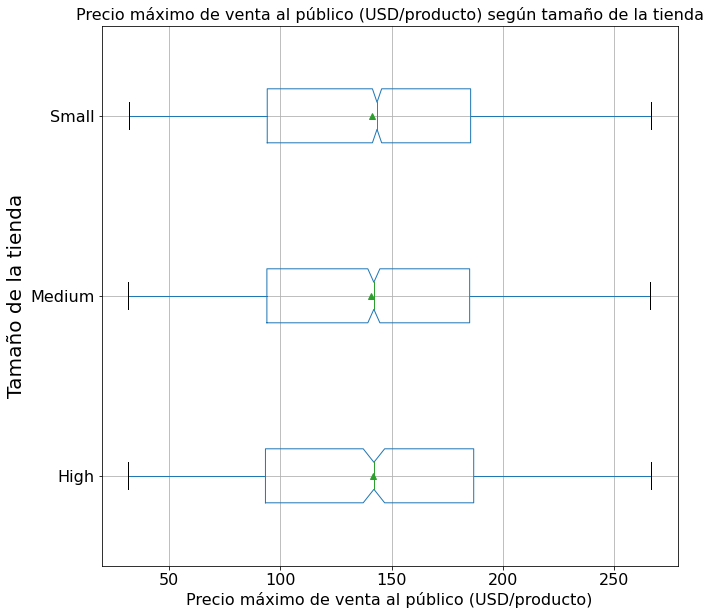

In [731]:
# 2.1.7. Boxplot de Precio máximo de venta al público (USD/producto) según Tamaño de la tienda en cuanto al área total
# Dado que los boxplot se solapan en todas los tamaños de tienda se puede concluir que:
# No existen diferencias estadísticamente significativa entre las medianas de los precios máximos de los productos y los tamaños de tiendas.
# Ausencia de valores atípicos

df.boxplot(column=['Item_MRP'],
                   by='Outlet_Size',
                   vert=False,
                   notch=True,
                   showmeans=True,
                   figsize=(10,10))
plt.title('Precio máximo de venta al público (USD/producto) según tamaño de la tienda',fontsize=16);
plt.suptitle('');
plt.xlabel('Precio máximo de venta al público (USD/producto)', fontsize = 16);
plt.ylabel('Tamaño de la tienda', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


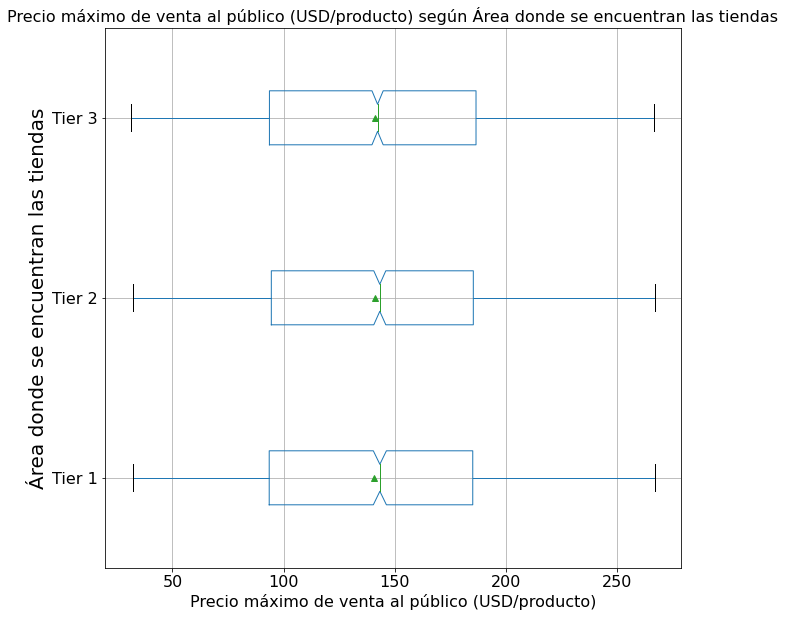

In [732]:
# 2.1.8. Boxplot de Precio máximo de venta al público (USD/producto) según tipo de Área donde se encuentra la tienda
# Dado que los boxplot se solapan en todas las áreas donde se encuentra las tiendas se puede concluir que:
# No existen diferencias estadísticamente significativa entre las medianas de los precios máximos de los productos y las áreas donde se encuentran las tiendas.
# Ausencia de valores atípicos

df.boxplot(column=['Item_MRP'],
                   by='Outlet_Location_Type',
                   vert=False,
                   notch=True,
                   showmeans=True,
                   figsize=(10,10))
plt.title('Precio máximo de venta al público (USD/producto) según Área donde se encuentran las tiendas',fontsize=16);
plt.suptitle('');
plt.xlabel('Precio máximo de venta al público (USD/producto)', fontsize = 16);
plt.ylabel('Área donde se encuentran las tiendas', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


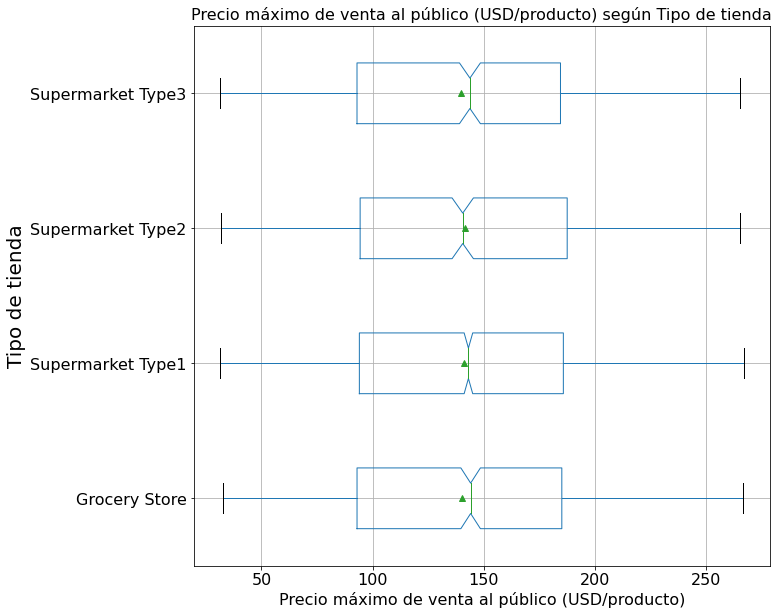

In [733]:
# 2.1.9. Boxplot de Precio máximo de venta al público (USD/producto) según tipo de tienda
# Dado que los boxplot se solapan en todas las áreas donde se encuentra las tiendas se puede concluir que:
# No existen diferencias estadísticamente significativa entre las medianas de los precios máximos de los productos y los tipos de tiendas.
# Ausencia de valores atípicos

df.boxplot(column=['Item_MRP'],
                   by='Outlet_Type',
                   vert=False,
                   notch=True,
                   showmeans=True,
                   figsize=(10,10))
plt.title('Precio máximo de venta al público (USD/producto) según Tipo de tienda',fontsize=16);
plt.suptitle('');
plt.xlabel('Precio máximo de venta al público (USD/producto)', fontsize = 16);
plt.ylabel('Tipo de tienda', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.show()

# 2.1. Correlaciones

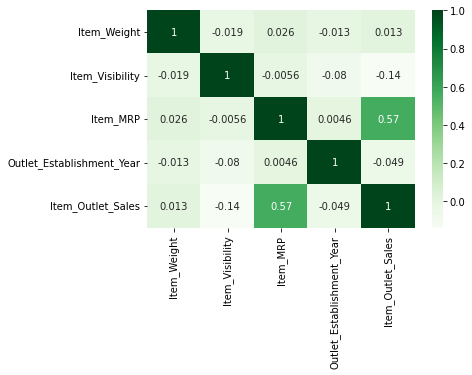

In [734]:
# La correlación más marcada es entre las columnas 'Item_Oulet_Sales' y 'Item_MRP'
# 'Item_Oulet_Sales' = Ventas del producto en una tienda en particular (variable objetivo a predecir)
# 'Item_MRP' = Precio máximo de venta al público (precio de catálogo) del producto
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

<function matplotlib.pyplot.show(*args, **kw)>

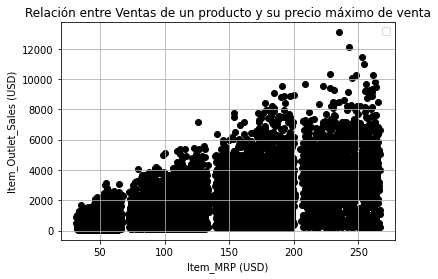

In [735]:
# Gráfico de dispersión para entender la correlación
X=df['Item_MRP']
Y=df['Item_Outlet_Sales']
# Parametrización de curvas
plt.scatter(X,Y,c='k')
#Parámetros generales
plt.title("Relación entre Ventas de un producto y su precio máximo de venta")
plt.xlabel('Item_MRP (USD)')
plt.ylabel('Item_Outlet_Sales (USD)')
plt.legend()
plt.grid(True)
plt.show

# **3. Preprocesamiento de datos para ML**

## 3.1. Identificar matriz de características (X) y vector objetivo (y).

**Identificación de columna objetivo (y)**
+ Item_Outlet_Sales (float64) -> Objetivo(y)

**Identificación de características (X) según tipo ordinal, nominal, numérico**


* Ordinales
  + Item_Fat_Content (object): Ordinal -> Encoder manual
  + Outlet_Establishment_Year (int64): Ordinal -> Encoder manual
  + Outlet_Size (object): Ordinal -> Encoder manual
* Numéricas
  + Item_Identifier (object): Excluida, dado que no otorga información útil
  + Item_Weight (float64): Numérica -> Escalar
  + Item_Visibility (float64): Numérica -> Escalar
  + Item_MRP (float64); Numérica -> escalar
* Nominales
  + Item_Type (object): Nominal -> ohe
  + Outlet_Identifier (object ): Nominal -> ohe
  + Outlet_Location_Type (object): Nominal  -> ohe
  + Outlet_Type (object) -> Nominal -> ohe


In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            7993 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


## 3.2. Codificar características ordinales

In [737]:
# Codificación ordinal columna 'Item_Fat_Content'
replacement_dictionary={'Low Fat':1,'Regular':2}
df['Item_Fat_Content'].replace(replacement_dictionary, inplace=True)
df['Item_Fat_Content']

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0       1
1       1
2       1
3       1
4       1
       ..
8518    1
8519    1
8520    1
8521    1
8522    1
Name: Item_Fat_Content, Length: 8519, dtype: int64

In [738]:
# Codificación ordinal columna 'Outlet_Establishment_Year'
replacement_dictionary={2009 : 0 , 2008 : 1 , 2007 : 2 , 2006 : 3 , 2005 : 4 , 2004 : 5 , 2003 : 6 ,
                        2002 : 7 , 2001 : 8 , 2000 : 9 , 1999 : 10 , 1998 : 11 , 1997 : 12 , 1996 : 13 ,
                        1995 : 14 , 1994 : 15 , 1993 : 16 , 1992 : 17 , 1991 : 18 , 1990 : 19 , 1989 : 20 ,
                        1988 : 21 , 1987 : 22 , 1986 : 23 , 1985 : 24}

df['Outlet_Establishment_Year'].replace(replacement_dictionary, inplace=True)
df['Outlet_Establishment_Year']

0       10
1        7
2        5
3        0
4       11
        ..
8518    12
8519     2
8520     5
8521    10
8522     7
Name: Outlet_Establishment_Year, Length: 8519, dtype: int64

In [739]:
# Codificación ordinal columna 'Outlet_Size'
replacement_dictionary={'Small':1,'Medium':2,'High':3}
df['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df['Outlet_Size']

0       2
1       1
2       1
3       2
4       1
       ..
8518    1
8519    1
8520    1
8521    2
8522    1
Name: Outlet_Size, Length: 8519, dtype: int64

## 3.3. Separar los datos en un matriz de características (X) y un vector objetivo (y).

In [740]:
y=df['Item_Outlet_Sales']
X=df.drop(columns=['Item_Outlet_Sales','Item_Identifier'])

## 3.4. Crear un train test split en los datos. Utilicen un número aleatorio 42 por coherencia.

In [741]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

## 3.5. Crear instancia de selectores de columnas

In [742]:
# Crear instancia de selectores de columnas
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

## 3.6. Crear instancia de transformadores

In [743]:
# Crear instancia de transformadores
freq_imputer= SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
scaler=StandardScaler()
ohe=OneHotEncoder(handle_unknown='ignore',sparse=False)

## 3.7. Crear instancia de pipeline

In [744]:
# Pipeline numérico
numeric_pipe = make_pipeline(mean_imputer,scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [745]:
# Pipeline categórico
categorical_pipe = make_pipeline(freq_imputer,ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

## 3.8. Crear instancia de ColumnTransformer

In [746]:
# Tuplas para Column_Tranformer
number_tuple=(numeric_pipe,num_selector)
category_tuple=(categorical_pipe,cat_selector)

# Crear instancia ColumnTransformer
preprocessor = make_column_transformer(number_tuple,category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f387c525f50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f387c525b90>)])

## 3.9. Aplicar transformador de datos

In [747]:
# Ajustar pipeline en los datos de entrenamiento
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f387c525f50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f387c525b90>)])

In [748]:
# Transformar conjunto de datos de entrenamiento y prueba
X_train_processed=preprocessor.transform(X_train)
X_test_processed=preprocessor.transform(X_test)

3.10. Examinar resultado

In [749]:
# Examinar resultado de la transformación
print('\n______________')
print("Valores faltantes en conjunto entrenamiento:",np.isnan(X_train_processed).sum().sum())
print("Valores faltantes en conjunto pruebas:",np.isnan(X_test_processed).sum().sum())
print('\n______________')
print('Todos los datos en X_train_processed aon de tipo:',X_train_processed.dtype)
print('Todos los datos en X_test_processed aon de tipo:',X_test_processed.dtype)
print('\n______________')
print('La forma de los datos es:',X_train_processed.shape)
print('\n______________')

X_train_processed


______________
Valores faltantes en conjunto entrenamiento: 0
Valores faltantes en conjunto pruebas: 0

______________
Todos los datos en X_train_processed aon de tipo: float64
Todos los datos en X_test_processed aon de tipo: float64

______________
La forma de los datos es: (6389, 39)

______________


array([[ 0.24031187,  1.35956511,  0.69420515, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.45600095, -0.73552932, -0.50209387, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20795851, -0.73552932, -0.32912444, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.51459991,  1.35956511, -0.96523009, ...,  0.        ,
         0.        ,  0.        ],
       [-1.60059444,  1.35956511, -0.45268554, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.60993753, -0.73552932, -0.211441  , ...,  1.        ,
         0.        ,  0.        ]])

# 4. Modelo de regresión múltiple con ML

##4.1. Crear instancia de modelo de regresión ML

In [750]:
reg=LinearRegression()

##4.2. Entrenar modelo con datos de entrenamiento

In [752]:
reg.fit(X_train_processed,y_train)

LinearRegression()

##4.3. Obtención de las predicciones del modelo

In [754]:
# Obtener predicciones del conjunto de entrenamiento
train_preds=reg.predict(X_train_processed)

In [755]:
# Obtener predicciones del conjunto de prueba
test_preds=reg.predict(X_test_processed)

##4.4. Metricas de evaluación del modelo

###4.4.1. Coeficiente de determinación (r^2)

In [756]:
# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=reg.score(X_train_processed,y_train)


0.564813961522491


In [757]:
# Coeficiente de determinación r^2 sobre datos de prueba
test_score=reg.score(X_test_processed,y_test)


0.5571139288853726


###4.4.2. Error medio absoluto (MAE)

In [759]:
# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

###4.4.3. Error medio cuadrático (MSE)

In [760]:
# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

###4.4.4. Raíz del error medio cuadrático (RMSE)

In [761]:
# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

###4.4.5. Evaluación del modelo

In [762]:
# Evaluación del modelo de regresión líneal
print('Métricas de evaluación del modelo de regresión lineal')
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',train_score)
print('Error medio absoluto:',mae_train)
print('Error medio cuadrático:',mse_train)
print('Raíz del error medio cuadrático:',rmse_train)
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',test_score)
print('Error medio absoluto:',mae_test)
print('Error medio cuadrático:',mse_test)
print('Raíz del error medio cuadrático:',rmse_test)


Métricas de evaluación del modelo de regresión lineal
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.564813961522491
Error medio absoluto: 838.9843459226795
Error medio cuadrático: 1276378.5554898768
Raíz del error medio cuadrático: 1129.769248780421
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.5571139288853726
Error medio absoluto: 829.1653717370892
Error medio cuadrático: 1260186.9792369055
Raíz del error medio cuadrático: 1122.5805001143149
